## Star Wars Survey

in this project we will be doing data cleaning of online surveys carried out by FiceThirthEight in other to answer the questions posed with the light of star Wars: 

Was the Episode V -The Empire Strikes Back(from Star Wars), the favourite movie from the fans? 
If not which was? What were their favourite characters? 

Does Education levels from the side of the fans, present themselves as a differentiator in the rating of the 6 Star Wars movies from the saga? 
Do we see differences in the fan base tastes

when we segment the data in terms of Gender.

And what was the most seen movie of all?

we will answer this questions as we walk through this project


#### The data has several columns, including:

RespondentID - An anonymized ID for the respondent (person taking the survey)

Gender - The respondent's gender

Age - The respondent's age

Household Income - The respondent's income

Education - The respondent's education level

Location (Census Region) - The respondent's location

Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response

Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

### Step 1, Data Import and view

In [178]:
# we will import pandas dataframe to read our csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

star_wars = pd.read_csv("star_wars.csv",encoding="ISO-8859-1")

#encoding="ISO-8859-1" was specified because of the documents encoding type which sems to use LATIN-1
#which is as a result of the data set containing some characters that are not in python's default.

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [179]:
#reviewing the columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [180]:
#we observed that some of the RespondentID has nan value which shouldnt be so
#we will have to drop all rows of RespondentID with nan value
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head(10)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

In [181]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Have you seen any of the 6 films in the Star Wars franchise has about 936 persons who said that the have seen it and at about 250 who have not actually seen it.

That's a lot of views and respondents

Now lets convert the column to boolean


In [182]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We can see that people who considered themselves as starwars film Franchise are 552, while at about 350 didnt fill in that row and at about 284 don'tconsider themselves as a starwars film franchise

In [183]:
#converting to boolean type to numerical through mapping
yes_no = {"Yes": True,
          "No": False
         }

for col in ['Have you seen any of the 6 films in the Star Wars franchise?',
           'Do you consider yourself to be a fan of the Star Wars film franchise?']:
    
    star_wars[col] = star_wars[col].map(yes_no)
    
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some col

#### Step 2: Cleaning and Mapping checkbox columns

In [184]:
# let us map our movie list now

star_war_mapping = {
      "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
} 

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(star_war_mapping)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [185]:
# time to rename our columns 
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'Seen Ep1',
                                     'Unnamed: 4': 'seen Ep2',
                                     'Unnamed: 5': 'seen Ep3',
                                     'Unnamed: 6': 'seen EP4',
                                     'Unnamed: 7': 'seen Ep5',
                                     'Unnamed: 8': 'seen Ep6'})
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen Ep1,seen Ep2,seen Ep3,seen EP4,seen Ep5,seen Ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Step 3:  Cleaning the ranking column

The ranking column is marked by respondents rating of each star_wars movies. we will now have to convert the columns corresponding to the rating of the various movies to numerical value. The columns are from [9:15]



In [186]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'Ranking Ep1',
    'Unnamed: 10': 'Ranking Ep2',
    'Unnamed: 11': 'Ranking Ep3',
    'Unnamed: 12': 'Ranking Ep4',
    'Unnamed: 13': 'Ranking Ep5',
    'Unnamed: 14': 'Ranking Ep6'
})

star_wars.columns[9:15].item #let us view the created changes

<bound method Index.item of Index(['Ranking Ep1', 'Ranking Ep2', 'Ranking Ep3', 'Ranking Ep4',
       'Ranking Ep5', 'Ranking Ep6'],
      dtype='object')>

In [187]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen Ep1,seen Ep2,seen Ep3,seen EP4,seen Ep5,seen Ep6,Ranking Ep1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Step 4: Finding the highest ranked movie

one of the easiest way of finding the highest value from different columns is to get the mean of each. with this, we can easily conclude on which is the highest.

we will find the mean of each ranking columns using the pd.DataFrame.mean() method

In [188]:
#nearest to point 1 means that it is the most ranked
ranking_mean = star_wars[star_wars.columns[9:15]].mean().sort_values(ascending=False)
ranking_mean

Ranking Ep3    4.341317
Ranking Ep2    4.087321
Ranking Ep1    3.732934
Ranking Ep4    3.272727
Ranking Ep6    3.047847
Ranking Ep5    2.513158
dtype: float64

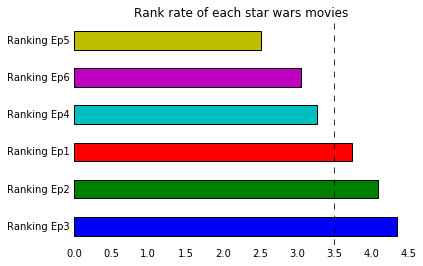

In [189]:
#visualizing the ranking value
%matplotlib inline


rank_graph = ranking_mean.plot.barh()
color= [(255/255,188/255,125/255),
       (180/255,200/255, 236/255),
       (200/255,200/255,200/255),
       (200/255,82/255,0/255),
       (255/255,194/255,10/255),
       (210/255,50/255,100/255)]

for key, spine in rank_graph.spines.items():
    spine.set_visible(False)
rank_graph.tick_params(
    bottom='off', left='off', right='off', top='off')
rank_graph.axvline(ranking_mean.mean(), alpha=.8, linestyle='--', color='black')
rank_graph.set_title('Rank rate of each star wars movies')
plt.show()

Generally, i have cleaned up the data after importing it, renamed some columns and got the ranking point of each movie in the star_wars

from the plot, it seems that those ranking_3 seems to be the least ranked and liked movie of the star_wars which corresponds to Star Wars: Episode III Revenge of the Sith and ranking_5 seems to be the most ranked which corresponds to the movie Star Wars: Episode V The Empire Strikes Back

### Now lets find the most viewed movie

In [190]:
# we will be working with the renamed column called seen

most_viewed = star_wars[star_wars.columns[3:9]].sum().sort_values(ascending=False)
most_viewed

seen Ep5    758
seen Ep6    738
Seen Ep1    673
seen EP4    607
seen Ep2    571
seen Ep3    550
dtype: int64

Seen_5 has the highest viewing rate while seen 3 recorded the least viewed movie.

we can now make conclusion that this corresponds to the values of the plot gotten from the ranked movies which showed that rank_5 is the most sort movie of star_wars

But let us plot the seen movies to visualize it


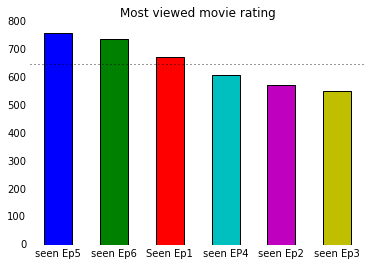

In [191]:
#we can choose to go like this
most_viewed = star_wars[star_wars.columns[3:9]].sum().copy().sort_values(ascending=False)
most_viewed_plot = most_viewed.plot.bar()

color= [(255/255,188/255,125/255),
       (180/255,200/255, 236/255),
       (200/255,200/255,200/255),
       (200/255,82/255,0/255),
       (255/255,194/255,10/255),
       (210/255,50/255,100/255)]

most_viewed_plot.axhline(most_viewed.mean(), alpha=.8, linestyle=':', color='black')
most_viewed_plot.tick_params(
    bottom='off', left='off', right='off', top='off')
for key, spine in most_viewed_plot.spines.items():
    spine.set_visible(False)


most_viewed_plot.set_title('most viewed of each star wars movies')
plt.title('Most viewed movie rating')
plt.xticks(rotation='horizontal')
plt.show()

Seen_5 has the highest viewing rate while seen 3 recorded the least viewed movie.

we can now make conclusion that this corresponds to the values of the plot gotten from the ranked movies which showed that rank_5 is the most sort movie of star_wars

seems like the old movies were seen the most than the newer ones

In [192]:
#lets see how our age in the data set is grouped

star_wars['Age'].value_counts().sort_values()

18-29    218
30-44    268
> 60     269
45-60    291
Name: Age, dtype: int64

### Step 5: Exploring the Data by Gender Segments

Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups;

Do you consider yourself to be a fan of the Star Wars film franchise? - True or False

Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
Gender - Male or Female


In [193]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

males.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen Ep1,seen Ep2,seen Ep3,seen EP4,seen Ep5,seen Ep6,Ranking Ep1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


### Now let us redo our various plots based on male and female gender segments

#### Ranking rate plot by female respondents

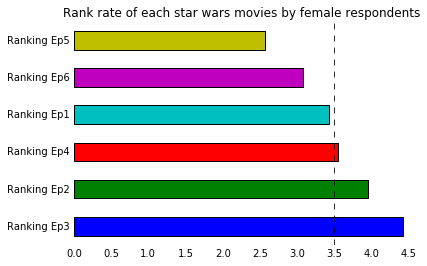

In [194]:
females_mean = females[females.columns[9:15]].mean().sort_values(ascending=False)

females_graph = females_mean.plot.barh()
color= [(255/255,188/255,125/255),
       (180/255,200/255, 236/255),
       (200/255,200/255,200/255),
       (200/255,82/255,0/255),
       (255/255,194/255,10/255),
       (210/255,50/255,100/255)]

for key, spine in females_graph.spines.items():
    spine.set_visible(False)
females_graph.tick_params(
    bottom='off', left='off', right='off', top='off')
females_graph.axvline(females_mean.mean(), alpha=.8, linestyle='--', color='black')
females_graph.set_title('Rank rate of each star wars movies by female respondents')
plt.show()

We could see that female correspondents rated Ranking_Ep5 movie of the Star wars as the best. While Ranking 3 got the list.

#### Ranking rate plot by male respondents

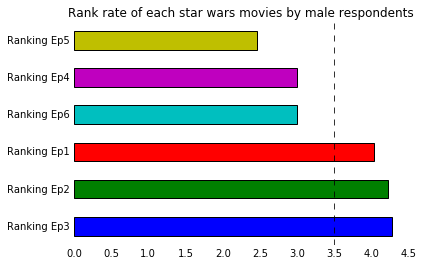

In [195]:
males_mean = males[males.columns[9:15]].mean().sort_values(ascending=False)

males_graph = males_mean.plot.barh()
color= [(255/255,188/255,125/255),
       (180/255,200/255, 236/255),
       (200/255,200/255,200/255),
       (200/255,82/255,0/255),
       (255/255,194/255,10/255),
       (210/255,50/255,100/255)]

for key, spine in males_graph.spines.items():
    spine.set_visible(False)
males_graph.tick_params(
    bottom='off', left='off', right='off', top='off')
males_graph.axvline(males_mean.mean(), alpha=.8, linestyle='--', color='black')
males_graph.set_title('Rank rate of each star wars movies by male respondents')
plt.show()

Male respondents still goes with Ranking_Ep3 as the best movie while rating Ep5 and Ep4 as equals.

#### Most female respondents watched star war movies

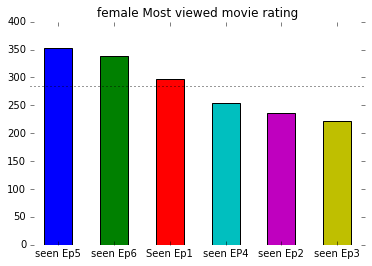

In [196]:
female_most_viewed = females[females.columns[3:9]].sum().copy().sort_values(ascending=False)
female_most_viewed_plot = female_most_viewed.plot.bar()

color= [(255/255,188/255,125/255),
       (180/255,200/255, 236/255),
       (200/255,200/255,200/255),
       (200/255,82/255,0/255),
       (255/255,194/255,10/255),
       (210/255,50/255,100/255)]

female_most_viewed_plot.axhline(female_most_viewed.mean(), alpha=.8, linestyle=':', color='black')
most_viewed_plot.tick_params(
    bottom='off', left='off', right='off', top='off')
for key, spine in female_most_viewed_plot.spines.items():
    spine.set_visible(False)


female_most_viewed_plot.set_title('female most viewed of each star wars movies')
plt.title('female Most viewed movie rating')
plt.xticks(rotation='horizontal')
plt.show()

 we could see how at about 350 females recorded the highest viewed mmovie for Ep5

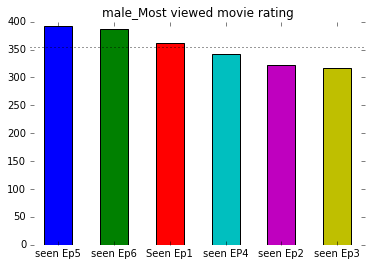

In [197]:
male_most_viewed = males[males.columns[3:9]].sum().copy().sort_values(ascending=False)
male_most_viewed_plot = male_most_viewed.plot.bar()

color= [(255/255,188/255,125/255),
       (180/255,200/255, 236/255),
       (200/255,200/255,200/255),
       (200/255,82/255,0/255),
       (255/255,194/255,10/255),
       (210/255,50/255,100/255)]

male_most_viewed_plot.axhline(male_most_viewed.mean(), alpha=.8, linestyle=':', color='black')
most_viewed_plot.tick_params(
    bottom='off', left='off', right='off', top='off')
for key, spine in male_most_viewed_plot.spines.items():
    spine.set_visible(False)


male_most_viewed_plot.set_title('male_most viewed of each star wars movies')
plt.title('male_Most viewed movie rating')
plt.xticks(rotation='horizontal')
plt.show()

Seems like more men viewed more star war movies. Ep5 still recorded the highest viewed movie.


### Step 6: Age distribution analysis

In [198]:
star_wars['Age'].value_counts().sort_values()

18-29    218
30-44    268
> 60     269
45-60    291
Name: Age, dtype: int64

In [199]:
Age_pivot = star_wars.pivot_table(
    index = 'Age',
    values = ['Ranking Ep1',
              'Ranking Ep2',
              'Ranking Ep3',
              'Ranking Ep4',
              'Ranking Ep5',
              'Ranking Ep6'],
    aggfunc='mean',
    dropna=True)
Age_pivot = Age_pivot.reset_index().copy()
Age_pivot.head()

,Age,Ranking Ep1,Ranking Ep2,Ranking Ep3,Ranking Ep4,Ranking Ep5,Ranking Ep6
0,18-29,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
1,30-44,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
2,45-60,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
3,> 60,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



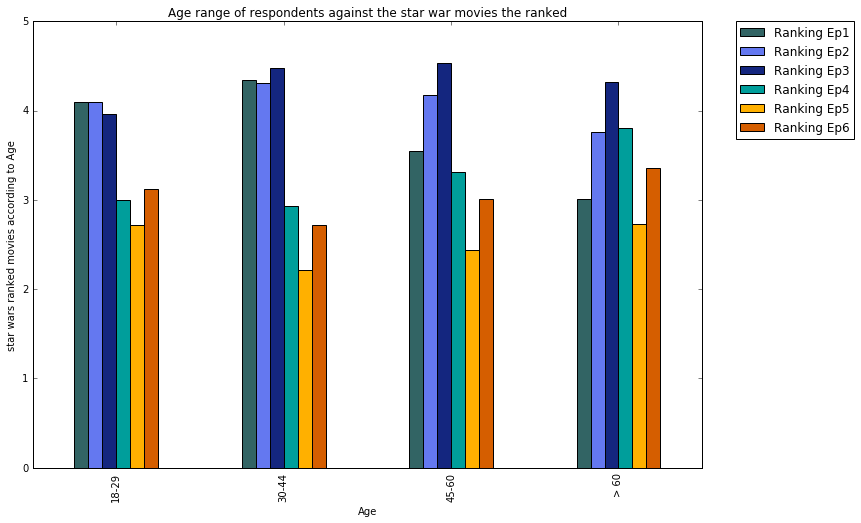

In [200]:
Age_ranked = Age_pivot.plot.bar(x='Age', y=['Ranking Ep1',
              'Ranking Ep2',
              'Ranking Ep3',
              'Ranking Ep4',
              'Ranking Ep5',
              'Ranking Ep6'], 
               figsize=(12,8),
               color=[(50/255,100/255,100/255),
                       (100/255,120/255,240/255),
                       (20/255,38/255,127/255),
                       (0/255,158/255,155/255),
                       (255/255,176/255,0/255),
                       (213/255, 94/255, 0/255)]
                        )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('star wars ranked movies according to Age')
plt.title('Age range of respondents against the star war movies the ranked')

relatively, accoring to most ranked which correlates to value closer to one, we could see that Episode 5 is the most ranked for all age groups, while Episode 3 seems to be least ranked for age group of 30-60+ but different from 18-29 which saw Ep1 and Ep2 as the least ranked

### Step 7: Analysing the Education  and Location columns columns

Let us view how the education role played in the movie rating.

steps to follow:

convert education and ranking to a pivot table

then plot using the pivot table to line plot

In [201]:
star_wars['Education'].value_counts().sort_values(ascending=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [202]:
#Education pivot according to ranking
education_pivot = star_wars.pivot_table(
    index = 'Education',
    values = ['Ranking Ep1',
              'Ranking Ep2',
              'Ranking Ep3',
              'Ranking Ep4',
              'Ranking Ep5',
              'Ranking Ep6'],
    aggfunc='mean',
    dropna=True)
education_pivot = education_pivot.reset_index().copy()
education_pivot.head()

,Education,Ranking Ep1,Ranking Ep2,Ranking Ep3,Ranking Ep4,Ranking Ep5,Ranking Ep6
0,Bachelor degree,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
1,Graduate degree,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
2,High school degree,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
3,Less than high school degree,5.000000,5.333333,3.666667,2.666667,1.000000,3.333333
4,Some college or Associate degree,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228


In [203]:
#let us visualize the plot of education with effects in ranking
edu_val = star_wars['Education'].value_counts()
edu_val

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



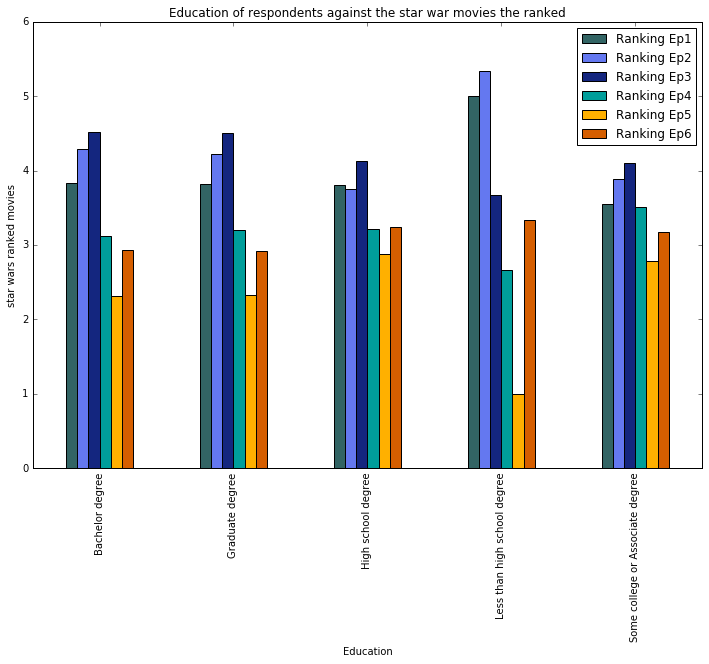

In [204]:
education_ranked = education_pivot.plot.bar(x='Education', y=['Ranking Ep1',
              'Ranking Ep2',
              'Ranking Ep3',
              'Ranking Ep4',
              'Ranking Ep5',
              'Ranking Ep6'], 
               figsize=(12,8),
               color=[(50/255,100/255,100/255),
                       (100/255,120/255,240/255),
                       (20/255,38/255,127/255),
                       (0/255,158/255,155/255),
                       (255/255,176/255,0/255),
                       (213/255, 94/255, 0/255)]
                        )
plt.ylabel('star wars ranked movies')
plt.title('Education of respondents against the star war movies the ranked')

we could see that those in less than high school degree ranked the star war movie EP2 the most which is contrary to the cummulative average, which sees Ep3 as th most ranked

In [205]:
education_pivot_seen = star_wars.pivot_table(
    index = 'Education',
    values = ['Seen Ep1',
              'seen Ep2',
              'seen Ep3',
              'seen EP4',
              'seen Ep5',
              'seen Ep6'],
    aggfunc='mean',
    dropna=True)
education_pivot_seen = education_pivot_seen.reset_index().copy()
education_pivot_seen.head()

,Education,Seen Ep1,seen EP4,seen Ep2,seen Ep3,seen Ep5,seen Ep6
0,Bachelor degree,0.641745,0.607477,0.529595,0.507788,0.757009,0.728972
1,Graduate degree,0.650909,0.592727,0.541818,0.505455,0.752727,0.730909
2,High school degree,0.542857,0.504762,0.457143,0.457143,0.580952,0.571429
3,Less than high school degree,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
4,Some college or Associate degree,0.643293,0.548780,0.567073,0.557927,0.692073,0.679878


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



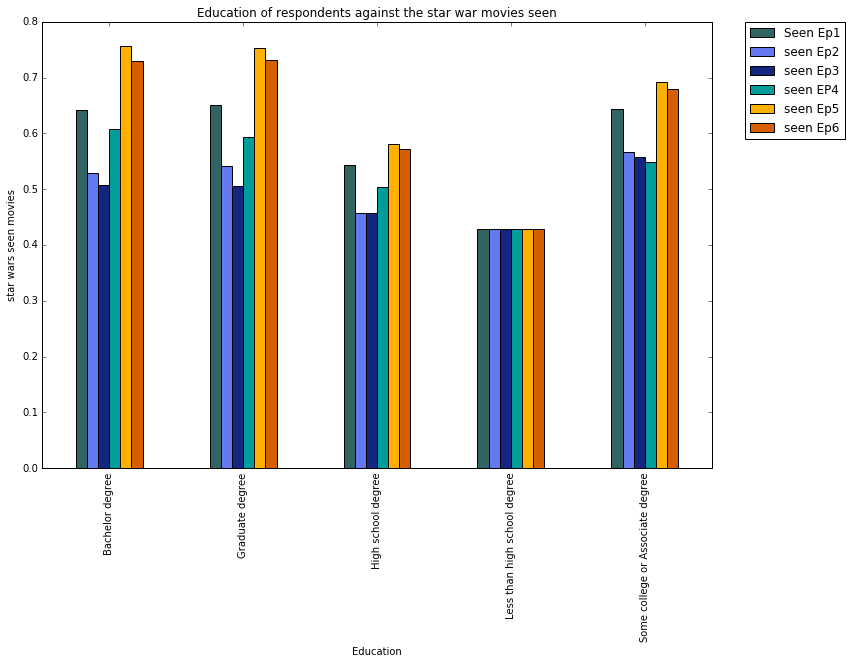

In [206]:
education_seen = education_pivot_seen.plot.bar(x='Education', y=['Seen Ep1',
                                                            'seen Ep2',
                                                            'seen Ep3',
                                                            'seen EP4',
                                                            'seen Ep5',
                                                            'seen Ep6'], 
                                                       figsize=(12,8),
                                       color=[(50/255,100/255,100/255),
                                               (100/255,120/255,240/255),
                                               (20/255,38/255,127/255),
                                               (0/255,158/255,155/255),
                                               (255/255,176/255,0/255),
                                               (213/255, 94/255, 0/255)]
                                                )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('star wars seen movies')
plt.title('Education of respondents against the star war movies seen')

In [207]:
locations = star_wars['Location (Census Region)']
locations.value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

Let us see how the regions perfromed in there ranking

In [208]:
locations_pivot = star_wars.pivot_table(index='Location (Census Region)',
                                 values =   ['Ranking Ep1',
                                            'Ranking Ep2',
                                            'Ranking Ep3',
                                            'Ranking Ep4',
                                            'Ranking Ep5',
                                            'Ranking Ep6'],
                                 aggfunc='mean',
                                 dropna=True)

locations_pivot= locations_pivot.reset_index().copy()
locations_pivot.head()

,Location (Census Region),Ranking Ep1,Ranking Ep2,Ranking Ep3,Ranking Ep4,Ranking Ep5,Ranking Ep6
0,East North Central,3.723881,4.074627,4.410448,3.358209,2.373134,3.059701
1,East South Central,3.875000,4.593750,4.375000,2.875000,2.250000,3.031250
2,Middle Atlantic,3.924731,4.215054,4.413043,3.064516,2.440860,2.924731
3,Mountain,4.000000,4.000000,4.279412,2.970588,2.794118,2.955882
4,New England,4.203390,4.166667,4.133333,3.083333,2.516667,2.866667


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



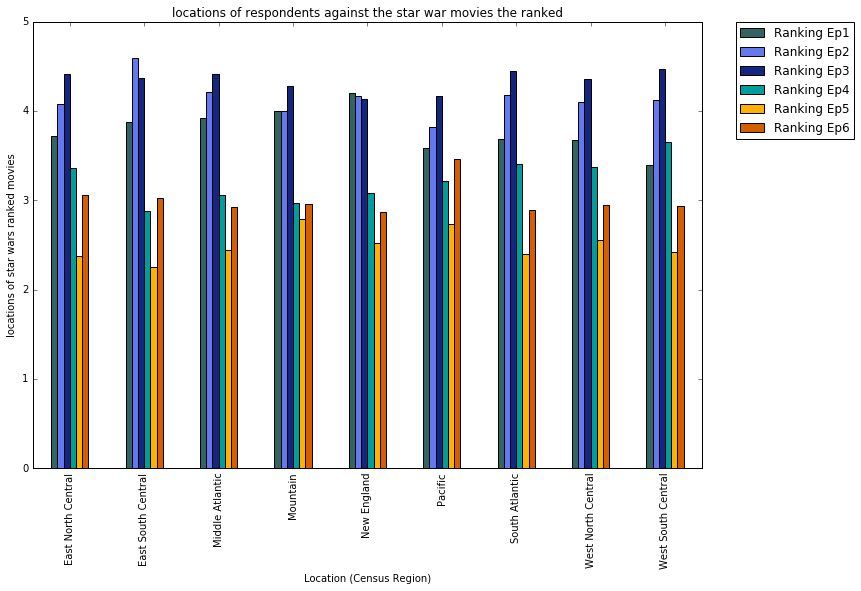

In [209]:
locations_ranked = locations_pivot.plot.bar(x='Location (Census Region)', y=['Ranking Ep1',
              'Ranking Ep2',
              'Ranking Ep3',
              'Ranking Ep4',
              'Ranking Ep5',
              'Ranking Ep6'], 
               figsize=(12,8),
               color=[(50/255,100/255,100/255),
                       (100/255,120/255,240/255),
                       (20/255,38/255,127/255),
                       (0/255,158/255,155/255),
                       (255/255,176/255,0/255),
                       (213/255, 94/255, 0/255)]
                        )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('locations of star wars ranked movies')
plt.title('locations of respondents against the star war movies the ranked')

### Step 9: Star Wars Character Analysis.

cleaning the columns from [15:29] which will show;

Which character do respondents like the most?

Which character do respondents dislike the most?

Which character is the most controversial (split between likes and dislikes)?

In [210]:
characters = star_wars.columns[15:29]
characters

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

renaming the unnamed columns with characters that featured in the star wars movies till episode 6

In [211]:
#renaming the columns showing the characters respondent feedback in the sta war data
star_wars = star_wars.rename(columns={'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
'Unnamed: 16': 'Luke Skywalker',
'Unnamed: 17': 'Princess Leia Organa',
'Unnamed: 18': 'Anakin Skywalker',
'Unnamed: 19': 'Obi Wan Kenobi',
'Unnamed: 20': 'Emperor Palpatine',
'Unnamed: 21': 'Darth Vader',
'Unnamed: 22': 'Lando Calrissian',
'Unnamed: 23': 'Boba Fett',
'Unnamed: 24': 'C-3P0',
'Unnamed: 25': 'R2 D2',
'Unnamed: 26': 'Jar Jar Binks',
'Unnamed: 27': 'Padme Amidala',
'Unnamed: 28': 'Yoda'}).copy()

star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

In [212]:
#checking the individual character columns to see the varying respondent options

star_wars['Han Solo'].value_counts(dropna=False).sort_values()

Very unfavorably                                 1
Somewhat unfavorably                             8
Unfamiliar (N/A)                                15
Neither favorably nor unfavorably (neutral)     44
Somewhat favorably                             151
NaN                                            357
Very favorably                                 610
Name: Han Solo, dtype: int64

In [213]:
star_wars['Luke Skywalker'].value_counts(dropna=False).sort_values()

Very unfavorably                                 3
Unfamiliar (N/A)                                 6
Somewhat unfavorably                            13
Neither favorably nor unfavorably (neutral)     38
Somewhat favorably                             219
NaN                                            355
Very favorably                                 552
Name: Luke Skywalker, dtype: int64

In [214]:
star_wars['Obi Wan Kenobi'].value_counts(dropna=False).sort_values()

Very unfavorably                                 7
Somewhat unfavorably                             8
Unfamiliar (N/A)                                17
Neither favorably nor unfavorably (neutral)     43
Somewhat favorably                             159
NaN                                            361
Very favorably                                 591
Name: Obi Wan Kenobi, dtype: int64

We could see that the respondent options varies from ver unfavorably, somewhat favorably down to very favorably. we even noticed respondents who werent familiar with the actors and some NaN values(probably the didnt feel it)

In [215]:
# lets see how this null value played a part in all the characters

star_wars[star_wars.columns[15:29]].isna().sum()

Han Solo                357
Luke Skywalker          355
Princess Leia Organa    355
Anakin Skywalker        363
Obi Wan Kenobi          361
Emperor Palpatine       372
Darth Vader             360
Lando Calrissian        366
Boba Fett               374
C-3P0                   359
R2 D2                   356
Jar Jar Binks           365
Padme Amidala           372
Yoda                    360
dtype: int64

We can't really work well with this, because some people can actually watch a movie without recognising the characters. This might be a reason for such nan values. we will have to drop them.

In [216]:
#dropping the null values 
star_wars_characters_rate = star_wars[star_wars.columns[15:29]].dropna(axis=0).copy()
star_wars_characters_rate.isna().sum()

Han Solo                0
Luke Skywalker          0
Princess Leia Organa    0
Anakin Skywalker        0
Obi Wan Kenobi          0
Emperor Palpatine       0
Darth Vader             0
Lando Calrissian        0
Boba Fett               0
C-3P0                   0
R2 D2                   0
Jar Jar Binks           0
Padme Amidala           0
Yoda                    0
dtype: int64

In [217]:
#let us replace our characters response anwers with 4 major groups

star_wars_characters_rate = star_wars_characters_rate.replace({
    'Very unfavorably': 'Unfavorably',
    'Somewhat unfavorably': 'Unfavorably', 
    'Unfamiliar (N/A)':  'Unknown',
    'Neither favorably nor unfavorably (neutral)': 'Neutral',
    'Somewhat favorably': 'Favorably',                                                                     
    'Very favorably': 'Favorably'          
        }).copy()

#some characters name are long, we will shorten it now
star_wars_characters_rate = star_wars_characters_rate.rename({
  'Princess Leia Organa': 'Princess Leia',
  'Anakin Skywalker': 'Anakin S',
  'Emperor Palpatine': 'Emperor P',
  'Lando Calrissian': 'Lando C'
})

star_wars_characters_rate.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Unknown,Unknown,Favorably,Favorably,Favorably,Favorably,Favorably
3,Favorably,Favorably,Favorably,Favorably,Favorably,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Unfavorably,Favorably,Favorably,Favorably,Favorably,Favorably
5,Favorably,Favorably,Favorably,Unfavorably,Favorably,Unfavorably,Favorably,Neutral,Favorably,Favorably,Favorably,Unfavorably,Favorably,Favorably
6,Favorably,Favorably,Favorably,Favorably,Favorably,Neutral,Favorably,Neutral,Favorably,Favorably,Favorably,Favorably,Neutral,Favorably


### Visualizing plots for most loved character and the least.

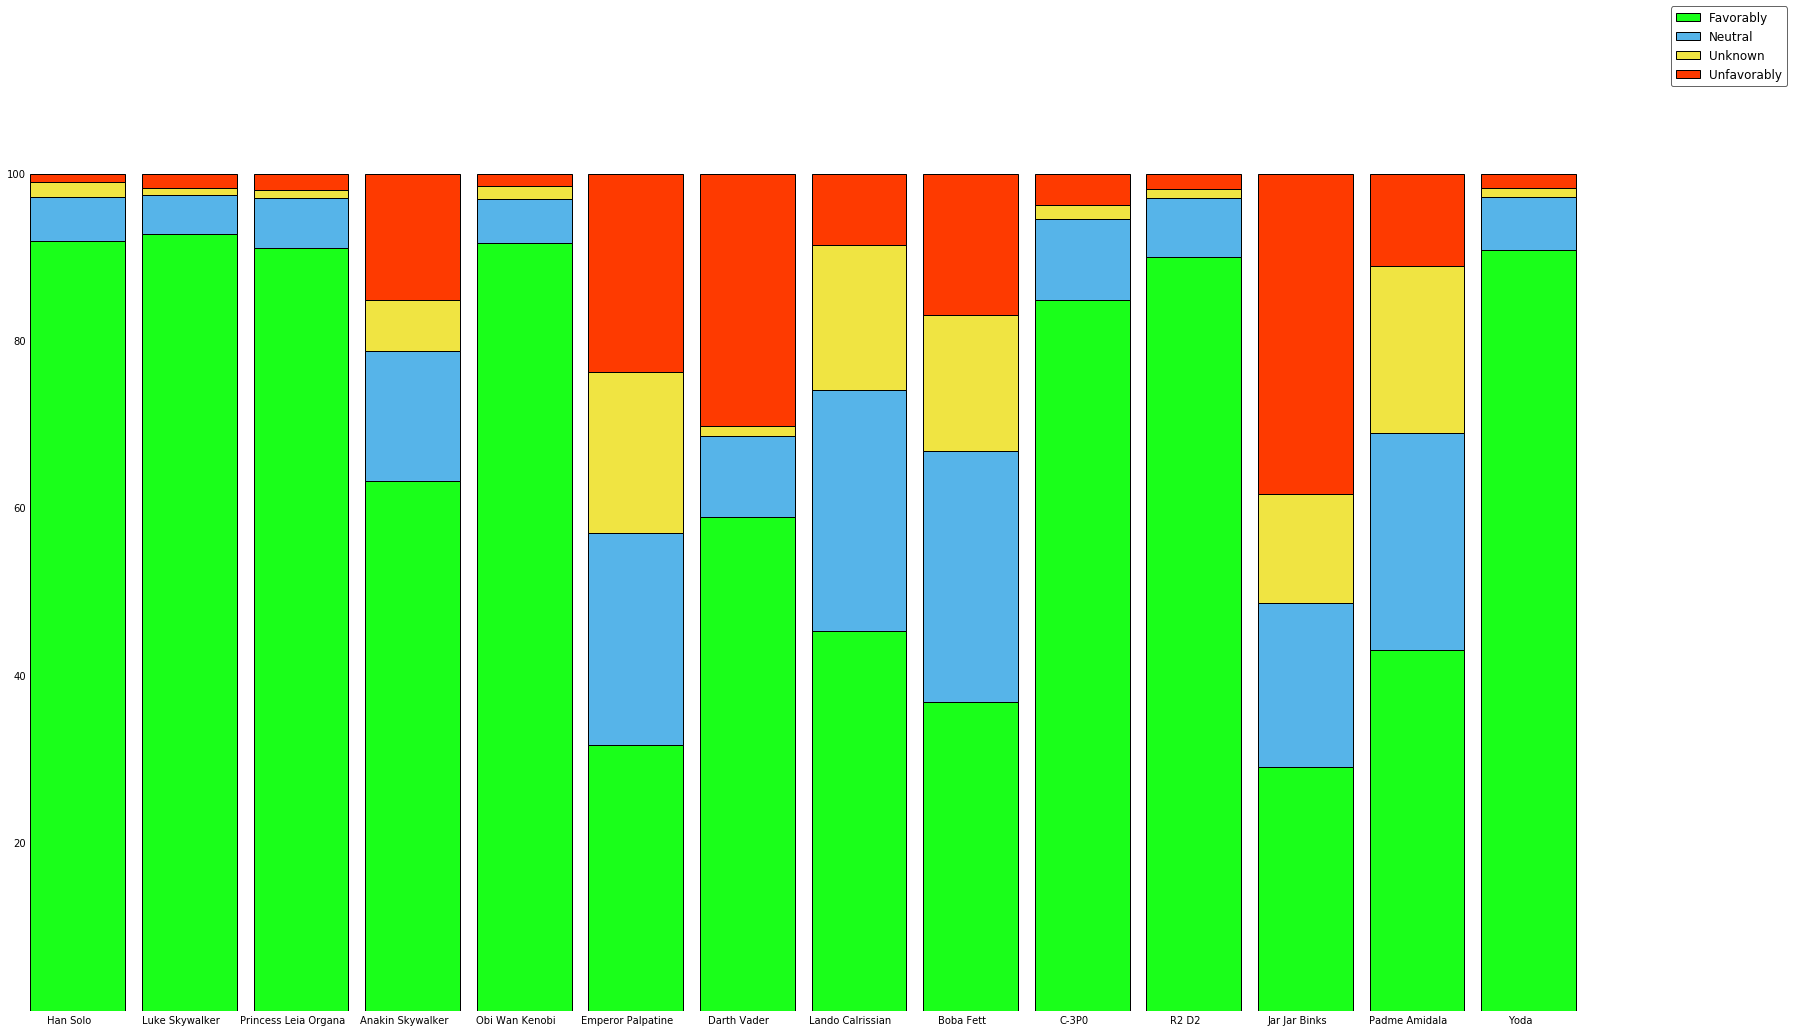

In [218]:
fig, ax = plt.subplots(figsize=(28,18))
characters = star_wars_characters_rate.columns.values
len_char = np.arange(len(characters))
bar_w = .85

#lets calculate the percentage of the 4 major groups
Favorably = ((star_wars_characters_rate == 
            'Favorably').sum()/star_wars_characters_rate.shape[0]) * 100
Unfavorably = ((star_wars_characters_rate == 
        'Unfavorably').sum()/star_wars_characters_rate.shape[0]) * 100
Neutral = (star_wars_characters_rate ==
          'Neutral').sum()/star_wars_characters_rate.shape[0] * 100
Unknown = (star_wars_characters_rate == 
           'Unknown').sum()/star_wars_characters_rate.shape[0] * 100



plt.bar(len_char, Favorably[len_char], color=(26/255,255/255,26/255), width = bar_w)
plt.bar(len_char, Neutral[len_char], bottom=Favorably[len_char], color=(86/255,180/255,233/255), width = bar_w)
plt.bar(len_char, Unknown[len_char], bottom=(Favorably[len_char]+ Neutral[len_char]), color=(240/255,228/255,66/255), width = bar_w)
plt.bar(len_char, Unfavorably[len_char], bottom=(Favorably[len_char]+ Neutral[len_char] + Unknown[len_char]), color=(254/255,58/255,0/255), width=bar_w)
plt.xticks(len_char+.35, characters)
plt.yticks(np.arange(20, 120, 20))

ax.tick_params(bottom='off', top='off', left='off', right='off')

for key, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labels=('Favorably', 'Neutral', 'Unknown', 'Unfavorably'), ncol=1, fancybox=True, framealpha=.6)


1) we could see that the most favorably character are Han Solo, Luke S, Princess, Obi Kenobi, R2D2 and yoda. This must have been for a reason, maybe probably the plot each character played on(Not a much fan of Star War movies, so can't really say why) but from further research, seems like the played the villian role.

2) The most disliked Characters are Jar Jar Binks, Darth Vader and Emperor.

3) The most controversial(spliting the likes and dislikes goes to) Lando and Anakin S.

### Summary

I totally analysed the Star war different movies. 

started with importing the csv file, doing some data cleaning and Making visualizations.

The conclusion is that, people actually responded, and majority of them are less than college degrees, meaning teens preffered the movies. This was concluded with the result of the most viewed.

Actually, Episode 5 was the most watched and ranked movies of star wars.

Characters from the plots were analysed and it seems that some fans didn't consider themselves as fans, probably why they didnt respond to the most disliked or liked character. 

From the responded Characters, seems like the villians were loved more from the roles that they played.

Does this mean that if there should be the next star war movies, we could probably see more villians?? just a guess from the data if the options of fans are considered.